In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate

In [2]:
def normalize(array):
    return (array - np.mean(array)) / np.std(array)

In [3]:
rate, data = wavfile.read('data.wav') # Hello, how is your day?
x = data.shape[0]
rate, data

(48000, array([0, 0, 0, ..., 0, 0, 0], dtype=int16))

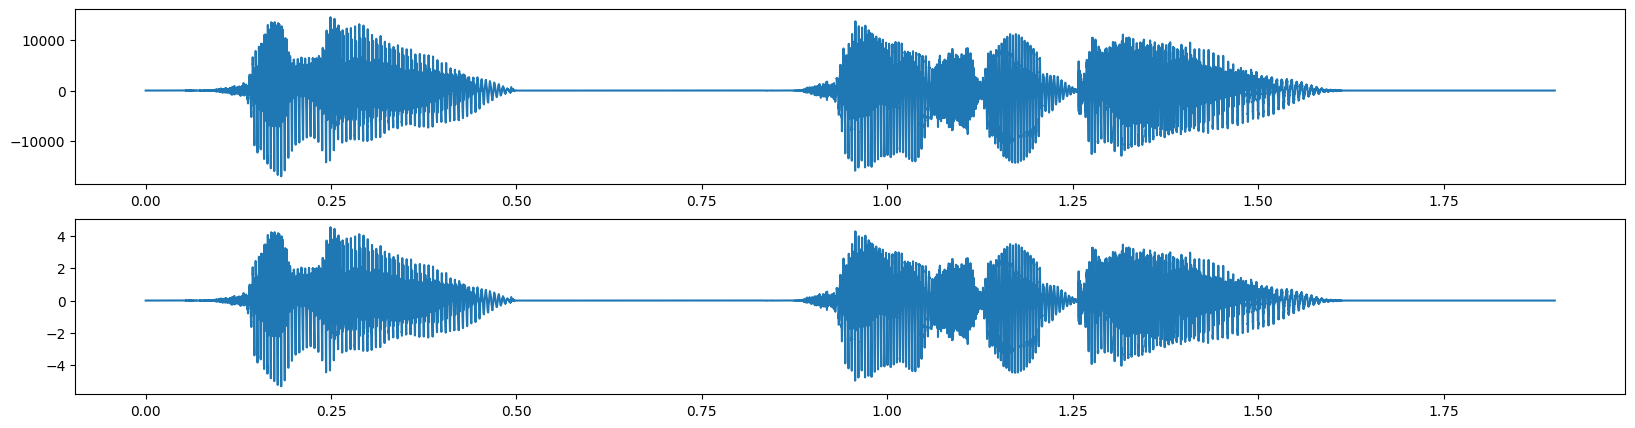

In [4]:
length = data.shape[0] / rate
time = np.linspace(0, length, data.shape[0])
ndata = normalize(data)
_, (ax1, ax2) = plt.subplots(2,1, figsize=(20,5))
ax1.plot(time, data)
ax2.plot(time, ndata)
plt.show()

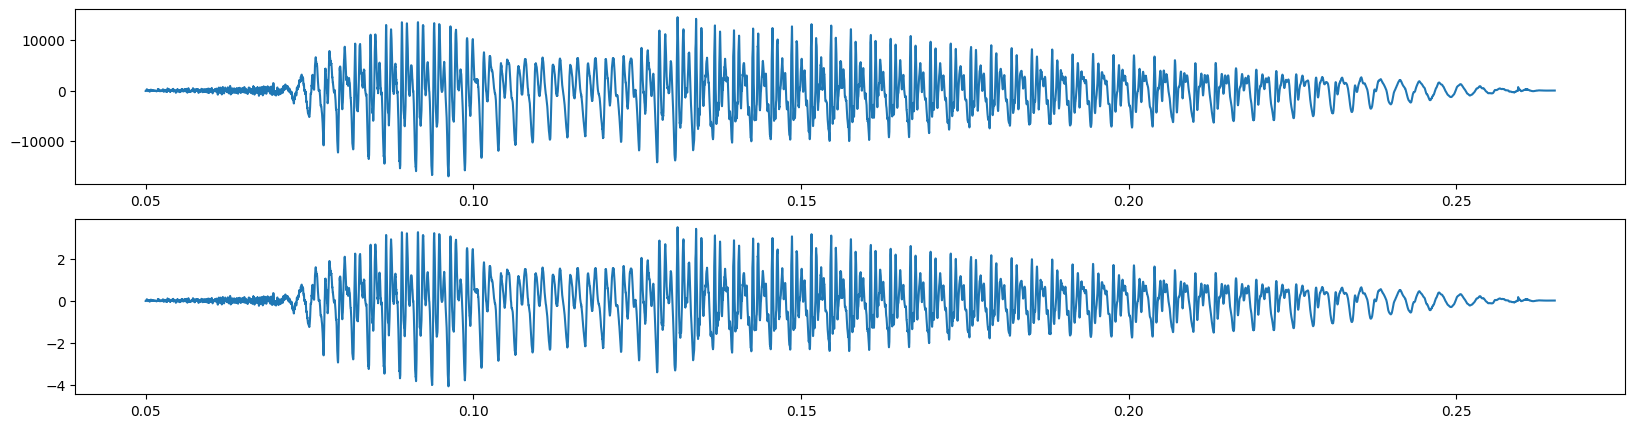

In [5]:
a, b = .05, .265
time = np.linspace(a, b, int((b-a)*x))
hello = data[int(a*x):int(b*x)]
nhello = normalize(hello)
_, (ax1, ax2) = plt.subplots(2,1, figsize=(20,5))
ax1.plot(time, hello)
ax2.plot(time, nhello)
plt.show()
wavfile.write('hello.wav', rate, hello)

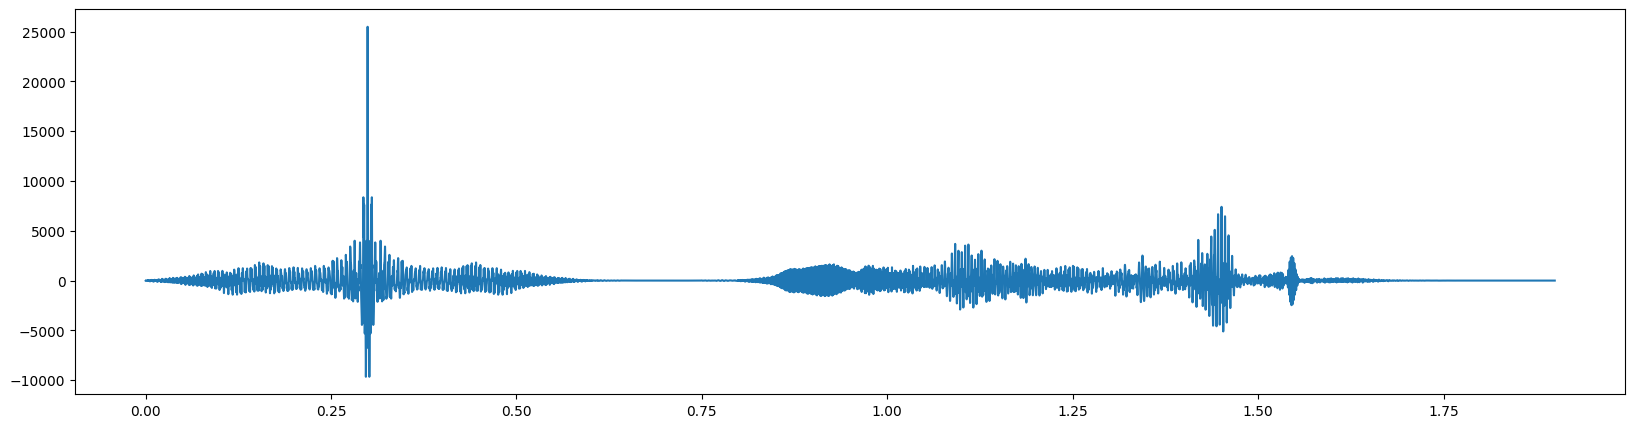

In [6]:
corr = correlate(ndata, nhello, 'same')
time = np.linspace(0, length, x)
plt.figure(figsize=(20,5))
plt.plot(time, corr)
plt.show()

### Correlation peaked. we assume 'hello' is the whole part of the peak

### Now we test if this template is found in other signals:

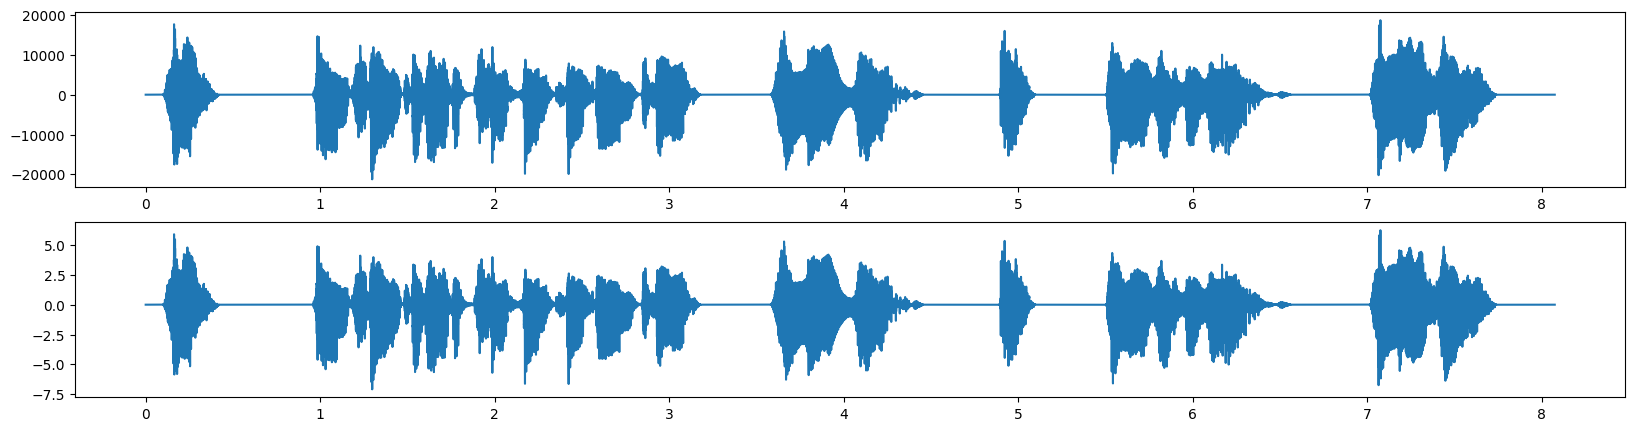

In [7]:
rate, test = wavfile.read('test.wav') # Hey, I am trying to write a program called "hello world". Oh! Hella has arrived! Hello Hella!
x = test.shape[0]
length = test.shape[0] / rate
time = np.linspace(0, length, test.shape[0])
ntest = normalize(test)
_, (ax1, ax2) = plt.subplots(2,1, figsize=(20,5))
ax1.plot(time, test)
ax2.plot(time, ntest)
plt.show()

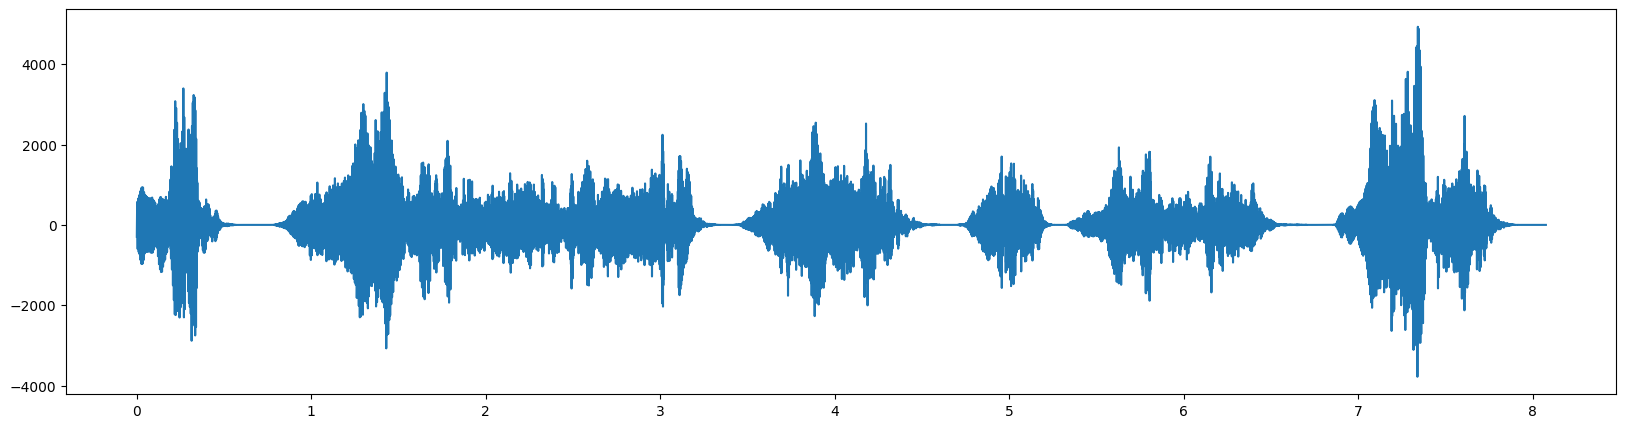

In [8]:
corr = correlate(ntest, nhello, 'same')
time = np.linspace(0, length, x)
plt.figure(figsize=(20,5))
plt.plot(time, corr)
plt.show()

### It identified the last "Hello" but not the first one(not reassuringly). It also correctly identfied "Hella" not as a "Hello".